In [253]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 

## Regr vol 1

In [254]:
df = pd.read_csv("boston.csv")
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


// BU SÜTUNLARIN NE ANLAMA GELDİĞİ README DOSYASINDA BULABİLİRSİNİZ.

In [255]:
df.shape

(506, 14)

## VERİ KONTROLÜ

In [256]:
df.count()

CRIM       506
ZN         506
INDUS      506
CHAS       506
NOX        506
RM         506
AGE        506
DIS        506
RAD        506
TAX        506
PTRATIO    506
B          506
LSTAT      506
PRICE      506
dtype: int64

In [257]:
df.isna().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
PRICE      0
dtype: int64

In [258]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  PRICE    506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


## Görselleştirme

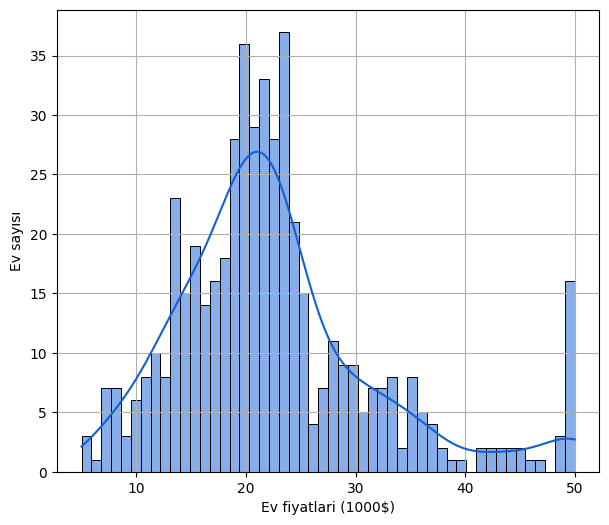

In [259]:
plt.figure(figsize=(7,6))
sns.histplot(df["PRICE"],bins=50, color="#125FD7",kde=True,ec="black")
plt.xlabel("Ev fiyatlari (1000$)")
plt.ylabel("Ev sayısı")
plt.grid();

<Axes: xlabel='RM', ylabel='Count'>

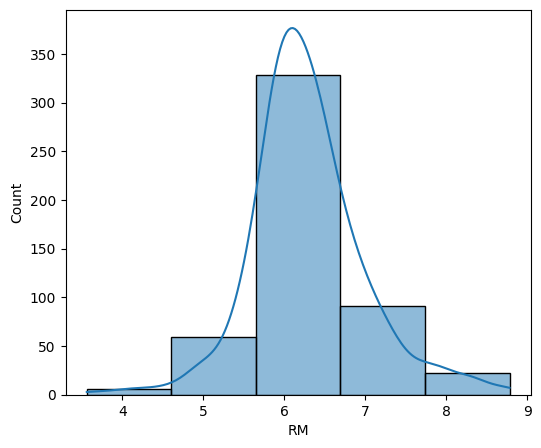

In [260]:
plt.figure(figsize=(6,5))
sns.histplot(df["RM"],bins=5,kde=True)

In [261]:
df["RM"].mean()

np.float64(6.284634387351779)

## İSTATİSTİKSEL İFADELER

In [262]:
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [263]:
df["PRICE"].corr(df["RM"]) # oda az olup deniz kenarı bi yer olabilir o yüzden 0.70 beklenir iyi bir korelasyon.

np.float64(0.6953599470715393)

In [264]:
df["PRICE"].corr(df["LSTAT"]) # statü yoksa fiyatlar düşüyor 

np.float64(-0.7376627261740151)

In [265]:
df.corr() # bu okunması zor biraz daha görsel üzerinden bakalım

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
CRIM,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
ZN,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
INDUS,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
CHAS,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
NOX,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
RM,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
AGE,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
DIS,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
RAD,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
TAX,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


## DAHA ÇOK GÖRSEL

<Axes: >

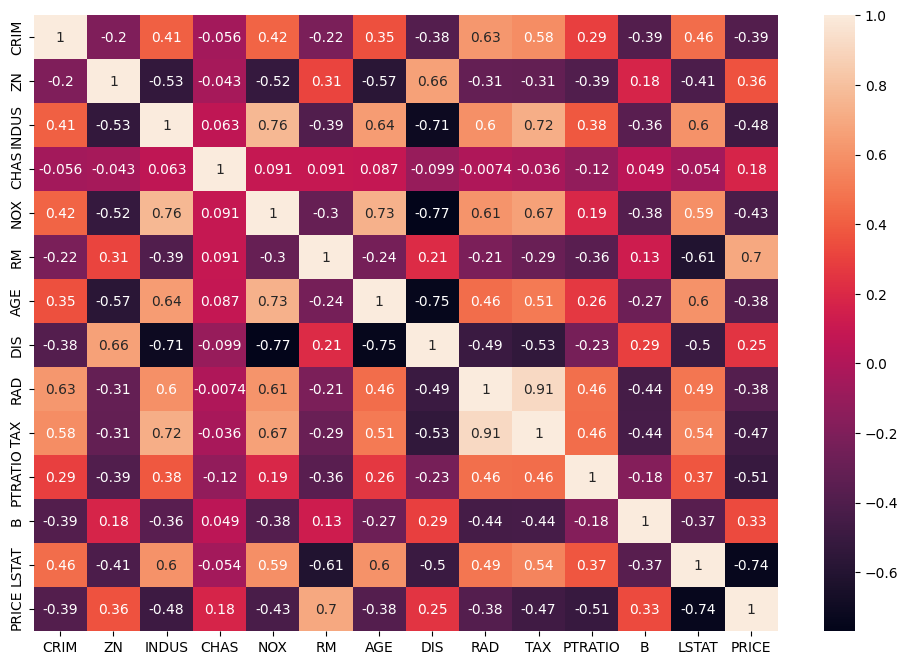

In [266]:
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(),annot=True)

# Regr vol 2

## train test

In [267]:
df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0


In [268]:
X = df.drop("PRICE",axis=1)
y = df["PRICE"]

In [269]:
from sklearn.model_selection import train_test_split

In [270]:
help(train_test_split)

Help on function train_test_split in module sklearn.model_selection._split:

train_test_split(*arrays, test_size=None, train_size=None, random_state=None, shuffle=True, stratify=None)
    Split arrays or matrices into random train and test subsets.

    Quick utility that wraps input validation,
    ``next(ShuffleSplit().split(X, y))``, and application to input data
    into a single call for splitting (and optionally subsampling) data into a
    one-liner.

    Read more in the :ref:`User Guide <cross_validation>`.

    Parameters
    ----------
    *arrays : sequence of indexables with same length / shape[0]
        Allowed inputs are lists, numpy arrays, scipy-sparse
        matrices or pandas dataframes.

    test_size : float or int, default=None
        If float, should be between 0.0 and 1.0 and represent the proportion
        of the dataset to include in the test split. If int, represents the
        absolute number of test samples. If None, the value is set to the
        com

In [271]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=9) # test_size niye hep 0.33 ? çünkü verinin %33 ünü kullanmasını istiyoruz. bunu da veri ne kadar yüksekse test_size i ona göre düşürebilirsiniz veriyi daha iyi anlar makine o zaman.

In [272]:
df.shape

(506, 14)

In [273]:
X_train.shape

(404, 13)

In [274]:
X_test.shape

(102, 13)

In [275]:
from sklearn.linear_model import LinearRegression

In [276]:
lin_regr = LinearRegression()

In [277]:
lin_regr.fit(X_train,y_train)

LinearRegression()

In [278]:
lin_test_pred = lin_regr.predict(X_test)

In [279]:
lin_test_pred

array([20.36258452, 15.1404188 , 33.99001657, 14.16446328, 19.53455548,
       23.14142993, 34.80925589, 28.14879881, 20.3672878 , 16.5493984 ,
       17.99037899, 26.90592129, 16.36639055, 31.83330187, 14.21253434,
       30.69615255, 18.74052098, 22.40678582, 31.08338555, 17.47961776,
       24.98296844,  5.36039382, 23.8310773 , 20.36761565, 28.00929785,
       43.46420122, 26.90900847, 15.00613748, 19.81185865, 23.95786579,
       13.40397559, 13.45147941, 21.16021135, 16.49608824, 21.423858  ,
       15.33146086, 31.05690972, 17.89335867, 13.11045886, 40.33938707,
       17.13205519, 22.96237316, 13.80695022, 38.47940506, 34.62068889,
       20.7982907 , 28.3477334 , 24.93425057,  5.79295127, 27.12837209,
       31.76894489, 35.08499695, 17.15579448, 26.88529045,  9.23910952,
       18.23762455, 19.48184266, 10.2339533 , 31.50093374, 17.20026459,
       19.52954141, 28.45092991, 14.02997628,  1.53778667, 32.69063821,
       18.44732031, 17.69704976, 19.60699532, 17.0668803 , 22.50

# Metrikler

In [280]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score,f1_score

In [281]:
print("R^2 : ", round(r2_score(y_true=y_test,y_pred=lin_test_pred),2))
print("MAE : ", round(mean_absolute_error(y_true=y_test,y_pred=lin_test_pred),2))
print("RMSE : ", round(np.sqrt((mean_squared_error(y_true=y_test,y_pred=lin_test_pred))),2))

R^2 :  0.77
MAE :  3.36
RMSE :  4.87


In [282]:
print("Ortalama fiyat  :", round(df["PRICE"].mean(),2))
print("Standart sapma  :", round(df["PRICE"].std(),2))

Ortalama fiyat  : 22.53
Standart sapma  : 9.2


# POLY REGR

In [283]:
from sklearn.preprocessing import PolynomialFeatures

In [284]:
poly_conv = PolynomialFeatures(degree=2, include_bias=True)

In [285]:
poly_feat = poly_conv.fit_transform(X)

In [286]:
X_train, X_test, y_train, y_test = train_test_split(poly_feat, y, test_size=0.2, random_state=9)

In [287]:
poly_model = LinearRegression(fit_intercept=True)

In [288]:
poly_model.fit(X_train,y_train)

LinearRegression()

In [289]:
poly_test_pred = poly_model.predict(X_test)

In [290]:
print("R^2 : ", round(r2_score(y_true=y_test,y_pred=poly_test_pred),2))
print("MAE : ", round(mean_absolute_error(y_true=y_test,y_pred=poly_test_pred),2))
print("RMSE : ", round(np.sqrt((mean_squared_error(y_true=y_test,y_pred=poly_test_pred))),2))

R^2 :  0.87
MAE :  2.72
RMSE :  3.61


#### BİR DOĞRUDANSA BİR EĞRİYE OTURTMAK ŞUAN BİZİM İÇİN DAHA İYİ SONUÇ VERİYORMUŞ BUNU ANLADIK. TEST EDELİM.

# Test

In [291]:
from sklearn.linear_model import LinearRegression

In [292]:
lin_regr2 = LinearRegression()
lin_regr2.fit(X,y)                          # Direkt verinin kendisini koyuyoruz.
lin_final_pred = lin_regr2.predict(X)

In [293]:
print("R^2 : ", round(r2_score(y_true=y,y_pred=lin_final_pred),2))
print("MAE : ", round(mean_absolute_error(y_true=y,y_pred=lin_final_pred),2))
print("RMSE : ", round(np.sqrt((mean_squared_error(y_true=y,y_pred=lin_final_pred))),2)) 

R^2 :  0.74
MAE :  3.27
RMSE :  4.68


In [294]:
lin_final_val = pd.Series(lin_final_pred)

In [295]:
lin_final_val

0      30.003843
1      25.025562
2      30.567597
3      28.607036
4      27.943524
         ...    
501    23.533341
502    22.375719
503    27.627426
504    26.127967
505    22.344212
Length: 506, dtype: float64

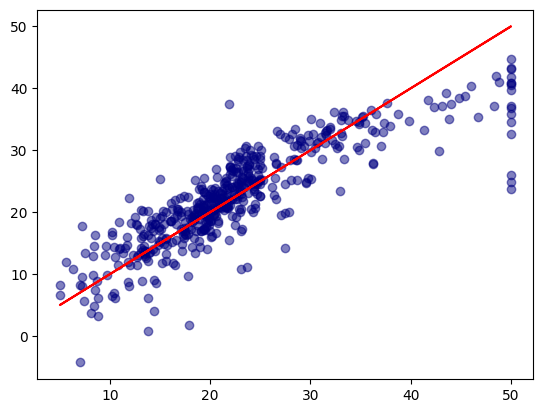

In [296]:
plt.scatter(x=y,y=lin_final_val,alpha=0.5,color='navy')
plt.plot(y,y,c="red")

In [297]:
lin_final_pred.max()

np.float64(44.67308338731308)

## residuals

In [298]:
residuals_lin = lin_final_val - y

In [299]:
residuals_lin

0       6.003843
1       3.425562
2      -4.132403
3      -4.792964
4      -8.256476
         ...    
501     1.133341
502     1.775719
503     3.727426
504     4.127967
505    10.444212
Length: 506, dtype: float64

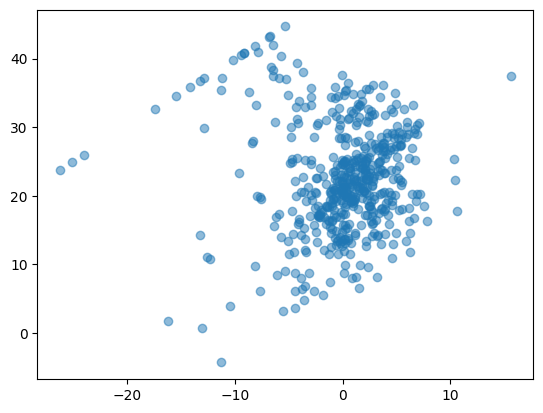

In [300]:
plt.scatter(residuals_lin,lin_final_val,alpha=0.5)

In [301]:
from sklearn.preprocessing import PolynomialFeatures

In [302]:
poly_conv2 = PolynomialFeatures(degree=2, include_bias=False)
poly_x = poly_conv.fit_transform(X)
final_poly_model = LinearRegression(fit_intercept=True)
final_poly_model.fit(poly_x,y)
poly_final_pred = final_poly_model.predict(poly_x)

In [303]:
print("R^2 : ", round(r2_score(y,poly_final_pred),2))
print("MAE : ", round(mean_absolute_error(y,y_pred=poly_final_pred),2))
print("RMSE : ", round(np.sqrt((mean_squared_error(y,poly_final_pred))),2))

R^2 :  0.92
MAE :  1.9
RMSE :  2.53


In [304]:
poly_final_val = pd.Series(poly_final_pred)

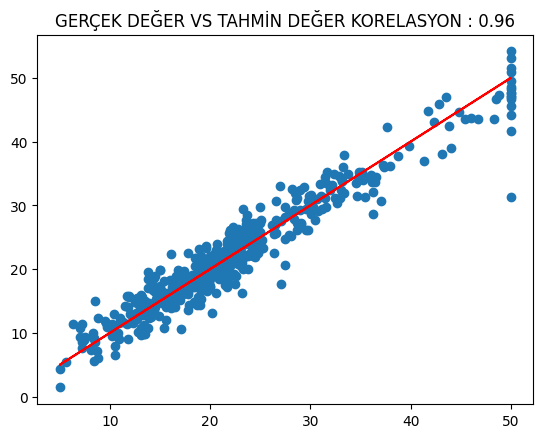

In [305]:
plt.scatter(x=y, y=poly_final_pred)
plt.plot(y,y, color="Red")

corr = round(y.corr(poly_final_val),2)
plt.title(f"GERÇEK DEĞER VS TAHMİN DEĞER KORELASYON : {corr}");

In [306]:
poly_residuals = poly_final_val - y

In [307]:
poly_residuals

0      0.325761
1      0.107423
2     -3.246578
3     -1.440805
4     -4.127880
         ...   
501   -3.142584
502   -4.394131
503   -1.556167
504   -1.493976
505    3.839208
Length: 506, dtype: float64

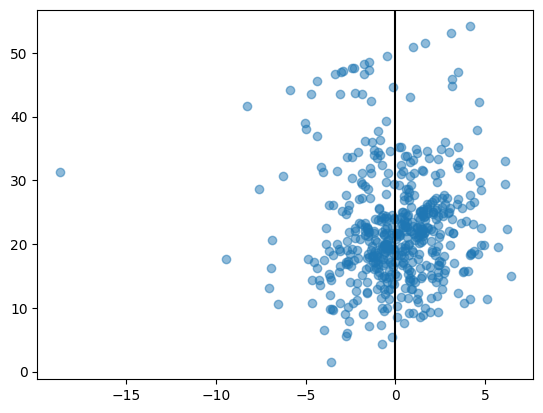

In [308]:
plt.scatter(x=poly_residuals,y=poly_final_pred,alpha=0.5)
plt.axvline(c="black");

# aşırı değerler olsa bile poly, linear den daha iyi 0 etrafında dağılmış.

## Aşırı değerleri çıkaralım

tahmini aşırı değerler 45k paraların üstünde. O değerlerin altını alıcam

In [309]:
df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0


In [310]:
yeni_df = df[df["PRICE"] < 45]

In [311]:
yeni_df["PRICE"].max()

np.float64(44.8)

In [321]:
yeni_df.shape

(484, 14)

In [323]:
X = yeni_df.drop("PRICE",axis=1)
y = yeni_df["PRICE"]

In [324]:
X.shape

(484, 13)

In [325]:
from sklearn.preprocessing import PolynomialFeatures

In [326]:
poly_conv2 = PolynomialFeatures(degree=2, include_bias=False)
poly_x = poly_conv.fit_transform(X)
final_poly_model = LinearRegression(fit_intercept=True)
final_poly_model.fit(poly_x,y)
poly_final_pred = final_poly_model.predict(poly_x)

In [327]:
print("R^2 : ", round(r2_score(y,poly_final_pred),2))
print("MAE : ", round(mean_absolute_error(y,y_pred=poly_final_pred),2))
print("RMSE : ", round(np.sqrt((mean_squared_error(y,poly_final_pred))),2))

R^2 :  0.91
MAE :  1.65
RMSE :  2.15


eski modelde;

R^2 : 0.92
MAE : 1.9
RMSE : 2.53 

bu durumda R^2 değeri 0.1 düşse bile hatalar daha az olduğu için uç değerleri çıkartarak daha iyi bir model oluşturduk diyebiliriz.

bununda resudualsına bakalım

In [328]:
new_model_resuduals = poly_final_pred - y

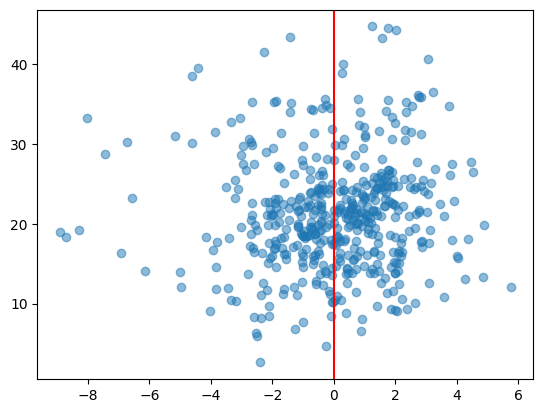

In [334]:
plt.scatter(x= new_model_resuduals, y=poly_final_pred,alpha=0.5)
plt.axvline(c="red");

# fena değil.

# MODEL DENEME

In [341]:
X.iloc[5],y.iloc[5] # y = price (28.7k dolar ev)

(CRIM         0.02985
 ZN           0.00000
 INDUS        2.18000
 CHAS         0.00000
 NOX          0.45800
 RM           6.43000
 AGE         58.70000
 DIS          6.06220
 RAD          3.00000
 TAX        222.00000
 PTRATIO     18.70000
 B          394.12000
 LSTAT        5.21000
 Name: 5, dtype: float64,
 np.float64(28.7))

In [342]:
bakinin_evi = X.iloc[5].values

In [344]:
bakinin_evi # şimdi bu sayısal veriyi modele verirsek tahmini evimizin fiyatını vericek 

array([2.9850e-02, 0.0000e+00, 2.1800e+00, 0.0000e+00, 4.5800e-01,
       6.4300e+00, 5.8700e+01, 6.0622e+00, 3.0000e+00, 2.2200e+02,
       1.8700e+01, 3.9412e+02, 5.2100e+00])

In [356]:
lin_regr.predict([bakinin_evi]) # lineer tahmin bu şekilde fena değil.

/home/baki/Desktop/House-price-prediction/ML/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([25.36221803])

In [364]:
poly_baki = poly_conv.fit_transform([bakinin_evi]) # polinom haline getirmemiz gerekiyor çünkü 105 sütun var poly de ama bakinin evi 13 sütunlu. 

In [365]:
poly_baki.shape

(1, 105)

In [360]:
final_poly_model.predict(poly_baki) # çok az farkla bi tık daha iyi.

array([25.49476343])

## modeli kaydedelim

In [362]:
from joblib import dump,load

In [363]:
dump(final_poly_model, "ev_fiyat.joblib")

['ev_fiyat.joblib']

In [366]:
sahibinden_satilik = load("ev_fiyat.joblib")

In [367]:
poly_baki = poly_conv.fit_transform([bakinin_evi])

In [368]:
sahibinden_satilik.predict(poly_baki)

array([25.49476343])

## PROJE BU KADARDI TEŞEKKÜRLER 